Import Dependencies

In [1]:
import pandas as pd
import requests
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import tensorflow as tf

<b>Data Cleaning</b>

In [2]:
pd.options.display.max_colwidth=300

In [3]:
surveyDF=pd.read_csv("survey_results_public.csv")
surveyDF

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write code sometimes as part of my work","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;Friend or family member;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)",Technical documentation;Blogs;Programming Games;Written Tutorials;Stack Overflow,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., University, College, etc)",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc);On the job training","Technical documentation;Blogs;Stack Overflow;Online books;Video-based Online Courses;Online challenges (e.g., daily or weekly coding challenges)",NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64741,64742,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, forum);On the job training;Online Courses or Certification",Technical documentation;Blogs;Written Tutorials;Stack Overflow;Video-based Online Courses;How-to videos,Coursera;Udemy,7,...,15-30 minutes a day,Less than 15 minutes a day,Somewhat long,Microservices,No,Yes,Yes,Too long,Easy,NaN
64742,64743,I am a developer by profession,"Employed, full-time",Fully remote,Bootstrapping a business;Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Friend or family member;School (i.e., University, College, etc);On the job training",NaN,NaN,20,...,30-60 minutes a day,15-30 minutes a day,Just right,NaN,Yes,No,Yes,Too long,Easy,NaN
64743,64744,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64744,64745,I am a developer by profession,"Employed, full-time",Full in-person,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, forum)","Technical documentation;Written Tutorials;Stack Overflow;Online books;Online challenges (e.g., daily or weekly coding challenges);Online forum",NaN,10,...,60-120 minutes a day,15-30 minutes a day,Somewhat long,Microservices;Developer portal or other central places to find tools/services,No,Yes,Yes,Appropriate in length,Easy,80000.0


In [4]:
surveyDF.drop(['MainBranch','ResponseId','LearnCode','LearnCodeOnline','LearnCodeCoursesCert','OrgSize','VersionControlSystem','SurveyEase',
               'SurveyLength','TBranch','ICorPM','Knowledge_1','Knowledge_1','Knowledge_2','Knowledge_3','Knowledge_4','Knowledge_5',
               'Knowledge_6','Knowledge_7','CodingActivities','YearsCode','PurchaseInfluence','BuyNewTool','VersionControlSystem',
               'VCInteraction','VCHostingPersonal use','VCHostingProfessional use','OfficeStackAsyncWantToWorkWith',
               'OfficeStackSyncHaveWorkedWith','Blockchain','SOAccount','SOPartFreq','Frequency_1','Frequency_2',
               'Frequency_3','TimeSearching','TimeAnswering','TrueFalse_1','TrueFalse_2','TrueFalse_3','ConvertedCompYearly',
               'Accessibility','NEWSOSites','SOVisitFreq','SOComm','Onboarding','OfficeStackSyncWantToWorkWith','LanguageWantToWorkWith',
               'WebframeWantToWorkWith','DatabaseWantToWorkWith','NEWCollabToolsWantToWorkWith','PlatformWantToWorkWith',
               'MiscTechWantToWorkWith','ToolsTechWantToWorkWith'],
              axis=1,inplace=True)
surveyDF.head(10)

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,...,OpSysPersonal use,OfficeStackAsyncHaveWorkedWith,Age,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp,ProfessionalTech
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Employed, full-time",Fully remote,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,...,Windows Subsystem for Linux (WSL),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Data scientist or machine learning specialist;Developer, front-end;Engineer, data;Engineer, site reliability",United Kingdom of Great Britain and Northern Ireland,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,...,Windows,NaN,25-34 years old,Man,No,Bisexual,White,"I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.);I have an anxiety disorder",NaN,NaN
3,"Employed, full-time",Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Developer, full-stack",Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,...,Windows,Jira Work Management;Trello,35-44 years old,Man,No,Straight / Heterosexual,White,None of the above,NaN,NaN
4,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Developer, front-end;Developer, full-stack;Developer, back-end;Developer, desktop or enterprise applications;Developer, QA or test",United States of America,USD\tUnited States dollar,NaN,NaN,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,...,macOS;Windows,NaN,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Student, full-time",NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,NaN,Germany,NaN,NaN,NaN,C++;Lua,...,macOS,Confluence,25-34 years old,"Or, in your own words:","Or, in your own words:",Prefer to self-describe:,"Or, in your own words:","Or, in your own words:",NaN,NaN
6,"Student, part-time",NaN,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,NaN,India,NaN,NaN,NaN,C++;HTML/CSS;JavaScript;PHP;Python;TypeScript,...,macOS,NaN,Under 18 years old,Man,No,NaN,Indian,None of the above,NaN,NaN
7,"Not employed, but looking for work",NaN,Some college/university study without earning a degree,NaN,"Developer, full-stack;Student",India,NaN,NaN,NaN,C;C++;HTML/CSS;Java;JavaScript;SQL,...,Windows,NaN,18-24 years old,Man,No,Straight / Heterosexual,Indian,None of the above,NaN,NaN
8,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Developer, back-end",Netherlands,EUR European Euro,46000.0,Yearly,NaN,...,Windows,Confluence;Jira Work Management,25-34 years old,Woman,No,Prefer to self-describe:,European,"Or, in your own words:",6.0,Innersource initiative;DevOps function;Microservices;Developer portal or other central places to find tools/services;Continuous integration (CI) and (more often) continuous delivery;Automated testing;Observability tools
9,"Independent contractor, freelancer, or self-employed",Fully remote,Some college/university study without earning a degree,30,"Developer, desktop or enterprise applications;Developer, mobile;Educator",Croatia,HRK\tCroatian kuna,NaN,NaN,Delphi;Java;Swift,...,Windows,NaN,45-54 years old,Woman,No,Straight / Heterosexual,White;European,None of the above,NaN,NaN


In [5]:
surveyDF.dropna(how=("any"),inplace=True)
surveyDF

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,...,OpSysPersonal use,OfficeStackAsyncHaveWorkedWith,Age,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp,ProfessionalTech
11,"Employed, full-time;Independent contractor, freelancer, or self-employed",Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,Engineering manager,United States of America,USD\tUnited States dollar,1.944000e+05,Yearly,C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL,...,Linux-based;macOS,Confluence;Jira Work Management;Notion;Trello,35-44 years old,Man,No,Straight / Heterosexual,White,"I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)",14.0,Innersource initiative;DevOps function;Microservices;Continuous integration (CI) and (more often) continuous delivery;Automated testing;Observability tools
12,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",United States of America,USD\tUnited States dollar,6.500000e+04,Yearly,C;HTML/CSS;Rust;SQL;Swift;TypeScript,...,Linux-based,Jira Work Management;Trello,25-34 years old,Man,No,Straight / Heterosexual,White,None of the above,5.0,DevOps function;Microservices
14,"Employed, full-time;Independent contractor, freelancer, or self-employed",Fully remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Developer, full-stack;Academic researcher;DevOps specialist",United States of America,USD\tUnited States dollar,1.100000e+05,Yearly,HTML/CSS;JavaScript;PHP;Python;R;Ruby;Scala,...,macOS,Asana;Jira Work Management;Trello,25-34 years old,Man,No,Straight / Heterosexual,White,None of the above,5.0,DevOps function;Continuous integration (CI) and (more often) continuous delivery;Automated testing
21,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Developer, full-stack",Italy,EUR European Euro,3.200000e+04,Yearly,Python;SQL;TypeScript,...,macOS,Confluence;Notion,25-34 years old,Man,No,Straight / Heterosexual,European,None of the above,4.0,None of these
22,"Employed, full-time",Fully remote,Something else,20,"Developer, back-end",Canada,CAD\tCanadian dollar,1.250000e+05,Yearly,C#;SQL;TypeScript,...,Windows,Confluence,35-44 years old,Man,No,Straight / Heterosexual,White;North American,None of the above,23.0,DevOps function;Microservices;Continuous integration (CI) and (more often) continuous delivery;Automated testing;Observability tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64723,"Employed, full-time",Fully remote,"Associate degree (A.A., A.S., etc.)",5,"Developer, desktop or enterprise applications",Canada,CAD\tCanadian dollar,1.405880e+05,Yearly,Bash/Shell;C#;HTML/CSS;JavaScript;SQL,...,Windows,Confluence,25-34 years old,Man,No,Gay or Lesbian,Southeast Asian,None of the above,5.0,DevOps function;Microservices;Continuous integration (CI) and (more often) continuous delivery
64727,"Employed, full-time",Full in-person,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Developer, back-end",Viet Nam,VND\tVietnamese dong,1.000000e+09,Monthly,Go;JavaScript;Python,...,Linux-based,Confluence;Jira Work Management,25-34 years old,Man,No,Straight / Heterosexual,Asian,None of the above,10.0,DevOps function;Microservices;Continuous integration (CI) and (more often) continuous delivery;Automated testing
64728,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, back-end",United States of America,USD\tUnited States dollar,1.900000e+05,Yearly,Clojure;HTML/CSS;Java;Kotlin;Swift;TypeScript,...,macOS,Confluence;Jira Work Management,25-34 years old,Man,No,Straight / Heterosexual,White,None of the above,5.0,Microservices;Developer portal or other central places to find tools/services;Continuous integration (CI) and (more often) continuous delivery;Automated testing;Observabil

In [6]:
newDF=surveyDF.reset_index(drop=True)
newDF

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,...,OpSysPersonal use,OfficeStackAsyncHaveWorkedWith,Age,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp,ProfessionalTech
0,"Employed, full-time;Independent contractor, freelancer, or self-employed",Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,Engineering manager,United States of America,USD\tUnited States dollar,1.944000e+05,Yearly,C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL,...,Linux-based;macOS,Confluence;Jira Work Management;Notion;Trello,35-44 years old,Man,No,Straight / Heterosexual,White,"I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)",14.0,Innersource initiative;DevOps function;Microservices;Continuous integration (CI) and (more often) continuous delivery;Automated testing;Observability tools
1,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",United States of America,USD\tUnited States dollar,6.500000e+04,Yearly,C;HTML/CSS;Rust;SQL;Swift;TypeScript,...,Linux-based,Jira Work Management;Trello,25-34 years old,Man,No,Straight / Heterosexual,White,None of the above,5.0,DevOps function;Microservices
2,"Employed, full-time;Independent contractor, freelancer, or self-employed",Fully remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Developer, full-stack;Academic researcher;DevOps specialist",United States of America,USD\tUnited States dollar,1.100000e+05,Yearly,HTML/CSS;JavaScript;PHP;Python;R;Ruby;Scala,...,macOS,Asana;Jira Work Management;Trello,25-34 years old,Man,No,Straight / Heterosexual,White,None of the above,5.0,DevOps function;Continuous integration (CI) and (more often) continuous delivery;Automated testing
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Developer, full-stack",Italy,EUR European Euro,3.200000e+04,Yearly,Python;SQL;TypeScript,...,macOS,Confluence;Notion,25-34 years old,Man,No,Straight / Heterosexual,European,None of the above,4.0,None of these
4,"Employed, full-time",Fully remote,Something else,20,"Developer, back-end",Canada,CAD\tCanadian dollar,1.250000e+05,Yearly,C#;SQL;TypeScript,...,Windows,Confluence,35-44 years old,Man,No,Straight / Heterosexual,White;North American,None of the above,23.0,DevOps function;Microservices;Continuous integration (CI) and (more often) continuous delivery;Automated testing;Observability tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7212,"Employed, full-time",Fully remote,"Associate degree (A.A., A.S., etc.)",5,"Developer, desktop or enterprise applications",Canada,CAD\tCanadian dollar,1.405880e+05,Yearly,Bash/Shell;C#;HTML/CSS;JavaScript;SQL,...,Windows,Confluence,25-34 years old,Man,No,Gay or Lesbian,Southeast Asian,None of the above,5.0,DevOps function;Microservices;Continuous integration (CI) and (more often) continuous delivery
7213,"Employed, full-time",Full in-person,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Developer, back-end",Viet Nam,VND\tVietnamese dong,1.000000e+09,Monthly,Go;JavaScript;Python,...,Linux-based,Confluence;Jira Work Management,25-34 years old,Man,No,Straight / Heterosexual,Asian,None of the above,10.0,DevOps function;Microservices;Continuous integration (CI) and (more often) continuous delivery;Automated testing
7214,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, back-end",United States of America,USD\tUnited States dollar,1.900000e+05,Yearly,Clojure;HTML/CSS;Java;Kotlin;Swift;TypeScript,...,macOS,Confluence;Jira Work Management,25-34 years old,Man,No,Straight / Heterosexual,White,None of the above,5.0,Microservices;Developer portal or other central places to find tools/services;Continuous integration (CI) and (more often) continuous delivery;Automated testing;Observability tool

In [7]:
newDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7217 entries, 0 to 7216
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Employment                      7217 non-null   object 
 1   RemoteWork                      7217 non-null   object 
 2   EdLevel                         7217 non-null   object 
 3   YearsCodePro                    7217 non-null   object 
 4   DevType                         7217 non-null   object 
 5   Country                         7217 non-null   object 
 6   Currency                        7217 non-null   object 
 7   CompTotal                       7217 non-null   float64
 8   CompFreq                        7217 non-null   object 
 9   LanguageHaveWorkedWith          7217 non-null   object 
 10  DatabaseHaveWorkedWith          7217 non-null   object 
 11  PlatformHaveWorkedWith          7217 non-null   object 
 12  WebframeHaveWorkedWith          72

In [8]:
newDF["WorkExp"].astype("float")

0       14.0
1        5.0
2        5.0
3        4.0
4       23.0
        ... 
7212     5.0
7213    10.0
7214     5.0
7215    10.0
7216    25.0
Name: WorkExp, Length: 7217, dtype: float64

In [9]:
newDF["YearsCodePro"]=newDF["YearsCodePro"].str.replace("Less than 1 year","1")
newDF

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,...,OpSysPersonal use,OfficeStackAsyncHaveWorkedWith,Age,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp,ProfessionalTech
0,"Employed, full-time;Independent contractor, freelancer, or self-employed",Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,Engineering manager,United States of America,USD\tUnited States dollar,1.944000e+05,Yearly,C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL,...,Linux-based;macOS,Confluence;Jira Work Management;Notion;Trello,35-44 years old,Man,No,Straight / Heterosexual,White,"I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)",14.0,Innersource initiative;DevOps function;Microservices;Continuous integration (CI) and (more often) continuous delivery;Automated testing;Observability tools
1,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",United States of America,USD\tUnited States dollar,6.500000e+04,Yearly,C;HTML/CSS;Rust;SQL;Swift;TypeScript,...,Linux-based,Jira Work Management;Trello,25-34 years old,Man,No,Straight / Heterosexual,White,None of the above,5.0,DevOps function;Microservices
2,"Employed, full-time;Independent contractor, freelancer, or self-employed",Fully remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Developer, full-stack;Academic researcher;DevOps specialist",United States of America,USD\tUnited States dollar,1.100000e+05,Yearly,HTML/CSS;JavaScript;PHP;Python;R;Ruby;Scala,...,macOS,Asana;Jira Work Management;Trello,25-34 years old,Man,No,Straight / Heterosexual,White,None of the above,5.0,DevOps function;Continuous integration (CI) and (more often) continuous delivery;Automated testing
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Developer, full-stack",Italy,EUR European Euro,3.200000e+04,Yearly,Python;SQL;TypeScript,...,macOS,Confluence;Notion,25-34 years old,Man,No,Straight / Heterosexual,European,None of the above,4.0,None of these
4,"Employed, full-time",Fully remote,Something else,20,"Developer, back-end",Canada,CAD\tCanadian dollar,1.250000e+05,Yearly,C#;SQL;TypeScript,...,Windows,Confluence,35-44 years old,Man,No,Straight / Heterosexual,White;North American,None of the above,23.0,DevOps function;Microservices;Continuous integration (CI) and (more often) continuous delivery;Automated testing;Observability tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7212,"Employed, full-time",Fully remote,"Associate degree (A.A., A.S., etc.)",5,"Developer, desktop or enterprise applications",Canada,CAD\tCanadian dollar,1.405880e+05,Yearly,Bash/Shell;C#;HTML/CSS;JavaScript;SQL,...,Windows,Confluence,25-34 years old,Man,No,Gay or Lesbian,Southeast Asian,None of the above,5.0,DevOps function;Microservices;Continuous integration (CI) and (more often) continuous delivery
7213,"Employed, full-time",Full in-person,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Developer, back-end",Viet Nam,VND\tVietnamese dong,1.000000e+09,Monthly,Go;JavaScript;Python,...,Linux-based,Confluence;Jira Work Management,25-34 years old,Man,No,Straight / Heterosexual,Asian,None of the above,10.0,DevOps function;Microservices;Continuous integration (CI) and (more often) continuous delivery;Automated testing
7214,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, back-end",United States of America,USD\tUnited States dollar,1.900000e+05,Yearly,Clojure;HTML/CSS;Java;Kotlin;Swift;TypeScript,...,macOS,Confluence;Jira Work Management,25-34 years old,Man,No,Straight / Heterosexual,White,None of the above,5.0,Microservices;Developer portal or other central places to find tools/services;Continuous integration (CI) and (more often) continuous delivery;Automated testing;Observability tool

In [10]:
newDF["YearsCodePro"].astype("float")

0       10.0
1        5.0
2        5.0
3        4.0
4       20.0
        ... 
7212     5.0
7213    10.0
7214     5.0
7215     7.0
7216     3.0
Name: YearsCodePro, Length: 7217, dtype: float64

In [11]:
newDF['Employment'].value_counts()

Employed, full-time                                                                             5974
Employed, full-time;Independent contractor, freelancer, or self-employed                         740
Independent contractor, freelancer, or self-employed                                             305
Employed, part-time                                                                               80
Independent contractor, freelancer, or self-employed;Employed, part-time                          43
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time      36
Employed, full-time;Employed, part-time                                                           36
Employed, part-time;Retired                                                                        1
Employed, full-time;Retired                                                                        1
Employed, full-time;Independent contractor, freelancer, or self-employed;Retired           

In [12]:
# keep only 1. Employed, full-time 2. Employed, part-time 3. Independent contractor, freelancer, or self-employed to ensure only 1 source of income is being reported
employment_values = ['Employed, full-time', 'Employed, part-time', 'Independent contractor, freelancer, or self-employed']
def filter_rows_by_values(df, col, values):
    return df[df[col].isin(values)]

newDF = filter_rows_by_values(newDF, "Employment", values=employment_values)
newDF.head()

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,...,OpSysPersonal use,OfficeStackAsyncHaveWorkedWith,Age,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp,ProfessionalTech
1,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",United States of America,USD\tUnited States dollar,65000.0,Yearly,C;HTML/CSS;Rust;SQL;Swift;TypeScript,...,Linux-based,Jira Work Management;Trello,25-34 years old,Man,No,Straight / Heterosexual,White,None of the above,5.0,DevOps function;Microservices
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Developer, full-stack",Italy,EUR European Euro,32000.0,Yearly,Python;SQL;TypeScript,...,macOS,Confluence;Notion,25-34 years old,Man,No,Straight / Heterosexual,European,None of the above,4.0,None of these
4,"Employed, full-time",Fully remote,Something else,20,"Developer, back-end",Canada,CAD\tCanadian dollar,125000.0,Yearly,C#;SQL;TypeScript,...,Windows,Confluence,35-44 years old,Man,No,Straight / Heterosexual,White;North American,None of the above,23.0,DevOps function;Microservices;Continuous integration (CI) and (more often) continuous delivery;Automated testing;Observability tools
5,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,"Developer, back-end;Developer, mobile",Germany,EUR European Euro,85000.0,Yearly,Dart;Go;Java;Kotlin;Swift;TypeScript,...,macOS,Confluence,25-34 years old,Man,No,Straight / Heterosexual,White;European,None of the above,9.0,DevOps function;Microservices;Continuous integration (CI) and (more often) continuous delivery;Automated testing;Observability tools
7,"Independent contractor, freelancer, or self-employed",Fully remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Developer, back-end",Poland,PLN\tPolish zloty,30000.0,Monthly,HTML/CSS;JavaScript;Python;SQL;TypeScript,...,Linux-based;Windows,Notion;Trello,25-34 years old,Man,No,Straight / Heterosexual,European,None of the above,6.0,DevOps function;Developer portal or other central places to find tools/services;Continuous integration (CI) and (more often) continuous delivery;Automated testing;Observability tools


In [13]:
newDF['Employment'].value_counts() # check for changes

Employed, full-time                                     5974
Independent contractor, freelancer, or self-employed     305
Employed, part-time                                       80
Name: Employment, dtype: int64

In [14]:
newDF['Gender'].value_counts()

Man                                                                             5962
Woman                                                                            237
Non-binary, genderqueer, or gender non-conforming                                 52
Prefer not to say                                                                 50
Man;Non-binary, genderqueer, or gender non-conforming                             17
Or, in your own words:                                                            14
Man;Or, in your own words:                                                        13
Woman;Non-binary, genderqueer, or gender non-conforming                           12
Man;Woman;Non-binary, genderqueer, or gender non-conforming                        1
Man;Or, in your own words:;Non-binary, genderqueer, or gender non-conforming       1
Name: Gender, dtype: int64

In [15]:
# keep entries with only 1 answer
gender_values=['Man', 'Woman', 'Non-binary, genderqueer, or gender non-conforming']
newDF = filter_rows_by_values(newDF, "Gender", values=gender_values)
newDF['Gender'].value_counts() # check for changes

Man                                                  5962
Woman                                                 237
Non-binary, genderqueer, or gender non-conforming      52
Name: Gender, dtype: int64

In [16]:
currencies = newDF["Currency"].unique()
currencies

array(['USD\tUnited States dollar', 'EUR European Euro',
       'CAD\tCanadian dollar', 'PLN\tPolish zloty', 'UYU\tUruguayan peso',
       'SEK\tSwedish krona', 'INR\tIndian rupee', 'GBP\tPound sterling',
       'CNY\tChinese Yuan Renminbi', 'BRL\tBrazilian real',
       'VND\tVietnamese dong', 'TND\tTunisian dinar', 'DKK\tDanish krone',
       'CHF\tSwiss franc', 'THB\tThai baht', 'NOK\tNorwegian krone',
       'CZK\tCzech koruna', 'HUF\tHungarian forint',
       'BAM\tBosnia and Herzegovina convertible mark',
       'ILS\tIsraeli new shekel', 'IMP\tManx pound', 'TRY\tTurkish lira',
       'CRC\tCosta Rican colon', 'MAD\tMoroccan dirham',
       'ZAR\tSouth African rand', 'MXN\tMexican peso',
       'AUD\tAustralian dollar', 'IDR\tIndonesian rupiah',
       'LBP\tLebanese pound', 'JPY\tJapanese yen', 'ARS\tArgentine peso',
       'PKR\tPakistani rupee', 'HKD\tHong Kong dollar',
       'EGP\tEgyptian pound', 'NZD\tNew Zealand dollar',
       'KRW\tSouth Korean won', 'CLP\tChilean peso'

In [17]:
# get currency codes
currency_codes=[]
for c in currencies:
  currency_codes.append(c[0:3])
  # replace "Currency" column with currency codes
  newDF.loc[newDF["Currency"]==c, "Currency"] = c[0:3]
newDF.head() # check for updated column

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,...,OpSysPersonal use,OfficeStackAsyncHaveWorkedWith,Age,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp,ProfessionalTech
1,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",United States of America,USD,65000.0,Yearly,C;HTML/CSS;Rust;SQL;Swift;TypeScript,...,Linux-based,Jira Work Management;Trello,25-34 years old,Man,No,Straight / Heterosexual,White,None of the above,5.0,DevOps function;Microservices
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Developer, full-stack",Italy,EUR,32000.0,Yearly,Python;SQL;TypeScript,...,macOS,Confluence;Notion,25-34 years old,Man,No,Straight / Heterosexual,European,None of the above,4.0,None of these
4,"Employed, full-time",Fully remote,Something else,20,"Developer, back-end",Canada,CAD,125000.0,Yearly,C#;SQL;TypeScript,...,Windows,Confluence,35-44 years old,Man,No,Straight / Heterosexual,White;North American,None of the above,23.0,DevOps function;Microservices;Continuous integration (CI) and (more often) continuous delivery;Automated testing;Observability tools
5,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,"Developer, back-end;Developer, mobile",Germany,EUR,85000.0,Yearly,Dart;Go;Java;Kotlin;Swift;TypeScript,...,macOS,Confluence,25-34 years old,Man,No,Straight / Heterosexual,White;European,None of the above,9.0,DevOps function;Microservices;Continuous integration (CI) and (more often) continuous delivery;Automated testing;Observability tools
7,"Independent contractor, freelancer, or self-employed",Fully remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Developer, back-end",Poland,PLN,30000.0,Monthly,HTML/CSS;JavaScript;Python;SQL;TypeScript,...,Linux-based;Windows,Notion;Trello,25-34 years old,Man,No,Straight / Heterosexual,European,None of the above,6.0,DevOps function;Developer portal or other central places to find tools/services;Continuous integration (CI) and (more often) continuous delivery;Automated testing;Observability tools


In [18]:
# get currency exchange rates from May 24, 2022 to match methodology of original survey analysis
url = 'https://api.currencyapi.com/v3/historical?apikey=2dZBW01p3MVzbNmoHXdBpLU7nroSBsA0U9hPU4A2&currencies=&date=2022-05-24'
conversions = requests.get(url).json()
# save conversion rates in a df
conversion_rates_df = pd.DataFrame(conversions['data'].values())
conversion_rates_df

,code,value
0,AED,3.673160
1,AFN,89.502630
2,ALL,112.878030
3,AMD,452.708330
4,ANG,1.803370
...,...,...
148,YER,250.257430
149,ZAR,15.652040
150,ZMK,9001.200000
151,ZMW,17.160400


In [19]:
for c in currency_codes:
  # grab value from conversion rates df
  value = conversion_rates_df["value"].loc[conversion_rates_df["code"]==c].median()
  # print(c, value)
  # add value to newDF
  newDF.loc[newDF["Currency"]==c, "ConversionRates"] = value
newDF.head() # check for updated column

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,...,OfficeStackAsyncHaveWorkedWith,Age,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp,ProfessionalTech,ConversionRates
1,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",United States of America,USD,65000.0,Yearly,C;HTML/CSS;Rust;SQL;Swift;TypeScript,...,Jira Work Management;Trello,25-34 years old,Man,No,Straight / Heterosexual,White,None of the above,5.0,DevOps function;Microservices,1.00000
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Developer, full-stack",Italy,EUR,32000.0,Yearly,Python;SQL;TypeScript,...,Confluence;Notion,25-34 years old,Man,No,Straight / Heterosexual,European,None of the above,4.0,None of these,0.93156
4,"Employed, full-time",Fully remote,Something else,20,"Developer, back-end",Canada,CAD,125000.0,Yearly,C#;SQL;TypeScript,...,Confluence,35-44 years old,Man,No,Straight / Heterosexual,White;North American,None of the above,23.0,DevOps function;Microservices;Continuous integration (CI) and (more often) continuous delivery;Automated testing;Observability tools,1.28233
5,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,"Developer, back-end;Developer, mobile",Germany,EUR,85000.0,Yearly,Dart;Go;Java;Kotlin;Swift;TypeScript,...,Confluence,25-34 years old,Man,No,Straight / Heterosexual,White;European,None of the above,9.0,DevOps function;Microservices;Continuous integration (CI) and (more often) continuous delivery;Automated testing;Observability tools,0.93156
7,"Independent contractor, freelancer, or self-employed",Fully remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Developer, back-end",Poland,PLN,30000.0,Monthly,HTML/CSS;JavaScript;Python;SQL;TypeScript,...,Notion;Trello,25-34 years old,Man,No,Straight / Heterosexual,European,None of the above,6.0,DevOps function;Developer portal or other central places to find tools/services;Continuous integration (CI) and (more often) continuous delivery;Automated testing;Observability tools,4.28291


In [20]:
# add column 'ConvertedComp' by dividing CompTotal by ConversionRates
newDF['ConvertedComp'] = (newDF['CompTotal'] / newDF['ConversionRates']).round(decimals=2)
newDF.head() # check for updated column

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,...,Age,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp,ProfessionalTech,ConversionRates,ConvertedComp
1,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",United States of America,USD,65000.0,Yearly,C;HTML/CSS;Rust;SQL;Swift;TypeScript,...,25-34 years old,Man,No,Straight / Heterosexual,White,None of the above,5.0,DevOps function;Microservices,1.00000,65000.00
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Developer, full-stack",Italy,EUR,32000.0,Yearly,Python;SQL;TypeScript,...,25-34 years old,Man,No,Straight / Heterosexual,European,None of the above,4.0,None of these,0.93156,34350.98
4,"Employed, full-time",Fully remote,Something else,20,"Developer, back-end",Canada,CAD,125000.0,Yearly,C#;SQL;TypeScript,...,35-44 years old,Man,No,Straight / Heterosexual,White;North American,None of the above,23.0,DevOps function;Microservices;Continuous integration (CI) and (more often) continuous delivery;Automated testing;Observability tools,1.28233,97478.81
5,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,"Developer, back-end;Developer, mobile",Germany,EUR,85000.0,Yearly,Dart;Go;Java;Kotlin;Swift;TypeScript,...,25-34 years old,Man,No,Straight / Heterosexual,White;European,None of the above,9.0,DevOps function;Microservices;Continuous integration (CI) and (more often) continuous delivery;Automated testing;Observability tools,0.93156,91244.79
7,"Independent contractor, freelancer, or self-employed",Fully remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Developer, back-end",Poland,PLN,30000.0,Monthly,HTML/CSS;JavaScript;Python;SQL;TypeScript,...,25-34 years old,Man,No,Straight / Heterosexual,European,None of the above,6.0,DevOps function;Developer portal or other central places to find tools/services;Continuous integration (CI) and (more often) continuous delivery;Automated testing;Observability tools,4.28291,7004.58


In [21]:
# calculate yearly compensation assuming 12 working months and 50 working weeks
def yearly_compensation(frequency, amount):
  if frequency=='Monthly':
    return amount*12
  elif frequency=='Weekly':
    return amount*50
  else:
    return amount

newDF['YearlyComp'] = np.vectorize(yearly_compensation)(frequency=newDF['CompFreq'], amount=newDF['ConvertedComp'])
newDF.head() # check for updated column

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,...,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp,ProfessionalTech,ConversionRates,ConvertedComp,YearlyComp
1,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",United States of America,USD,65000.0,Yearly,C;HTML/CSS;Rust;SQL;Swift;TypeScript,...,Man,No,Straight / Heterosexual,White,None of the above,5.0,DevOps function;Microservices,1.00000,65000.00,65000.00
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Developer, full-stack",Italy,EUR,32000.0,Yearly,Python;SQL;TypeScript,...,Man,No,Straight / Heterosexual,European,None of the above,4.0,None of these,0.93156,34350.98,34350.98
4,"Employed, full-time",Fully remote,Something else,20,"Developer, back-end",Canada,CAD,125000.0,Yearly,C#;SQL;TypeScript,...,Man,No,Straight / Heterosexual,White;North American,None of the above,23.0,DevOps function;Microservices;Continuous integration (CI) and (more often) continuous delivery;Automated testing;Observability tools,1.28233,97478.81,97478.81
5,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,"Developer, back-end;Developer, mobile",Germany,EUR,85000.0,Yearly,Dart;Go;Java;Kotlin;Swift;TypeScript,...,Man,No,Straight / Heterosexual,White;European,None of the above,9.0,DevOps function;Microservices;Continuous integration (CI) and (more often) continuous delivery;Automated testing;Observability tools,0.93156,91244.79,91244.79
7,"Independent contractor, freelancer, or self-employed",Fully remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Developer, back-end",Poland,PLN,30000.0,Monthly,HTML/CSS;JavaScript;Python;SQL;TypeScript,...,Man,No,Straight / Heterosexual,European,None of the above,6.0,DevOps function;Developer portal or other central places to find tools/services;Continuous integration (CI) and (more often) continuous delivery;Automated testing;Observability tools,4.28291,7004.58,84054.96


In [22]:
# drop Currency, CompTotal, CompFreq, ConversionRates, and ConvertedComp - not needed anymore
newDF.drop(['Currency', 'CompTotal', 'CompFreq', 'ConversionRates', 'ConvertedComp'], axis=1, inplace=True)
newDF.head()

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,...,OfficeStackAsyncHaveWorkedWith,Age,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp,ProfessionalTech,YearlyComp
1,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",United States of America,C;HTML/CSS;Rust;SQL;Swift;TypeScript,PostgreSQL,AWS,React.js,...,Jira Work Management;Trello,25-34 years old,Man,No,Straight / Heterosexual,White,None of the above,5.0,DevOps function;Microservices,65000.00
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Developer, full-stack",Italy,Python;SQL;TypeScript,MySQL;Redis;SQLite,Google Cloud;OVH;VMware,Angular;FastAPI;Vue.js,...,Confluence;Notion,25-34 years old,Man,No,Straight / Heterosexual,European,None of the above,4.0,None of these,34350.98
4,"Employed, full-time",Fully remote,Something else,20,"Developer, back-end",Canada,C#;SQL;TypeScript,Microsoft SQL Server;PostgreSQL;Redis,Google Cloud;Microsoft Azure,Angular;ASP.NET Core ;React.js,...,Confluence,35-44 years old,Man,No,Straight / Heterosexual,White;North American,None of the above,23.0,DevOps function;Microservices;Continuous integration (CI) and (more often) continuous delivery;Automated testing;Observability tools,97478.81
5,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,"Developer, back-end;Developer, mobile",Germany,Dart;Go;Java;Kotlin;Swift;TypeScript,PostgreSQL;Redis;SQLite,AWS;Microsoft Azure,Express;Gatsby;Node.js,...,Confluence,25-34 years old,Man,No,Straight / Heterosexual,White;European,None of the above,9.0,DevOps function;Microservices;Continuous integration (CI) and (more often) continuous delivery;Automated testing;Observability tools,91244.79
7,"Independent contractor, freelancer, or self-employed",Fully remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Developer, back-end",Poland,HTML/CSS;JavaScript;Python;SQL;TypeScript,Microsoft SQL Server;MySQL;PostgreSQL;Redis;SQLite,AWS;Heroku;OVH,Django;FastAPI;React.js,...,Notion;Trello,25-34 years old,Man,No,Straight / Heterosexual,European,None of the above,6.0,DevOps function;Developer portal or other central places to find tools/services;Continuous integration (CI) and (more often) continuous delivery;Automated testing;Observability tools,84054.96


In [23]:
newDF.to_csv("cleanedSurvey.csv", index=False) # save a clean version of data without index



<b> Preprocessing </b>

In [24]:
#  Import and read the cleaned data
clean_df = pd.read_csv("cleanedSurvey.csv")
clean_df.count()

Employment                        6251
RemoteWork                        6251
EdLevel                           6251
YearsCodePro                      6251
DevType                           6251
Country                           6251
LanguageHaveWorkedWith            6251
DatabaseHaveWorkedWith            6251
PlatformHaveWorkedWith            6251
WebframeHaveWorkedWith            6251
MiscTechHaveWorkedWith            6251
ToolsTechHaveWorkedWith           6251
NEWCollabToolsHaveWorkedWith      6251
OpSysProfessional use             6251
OpSysPersonal use                 6251
OfficeStackAsyncHaveWorkedWith    6251
Age                               6251
Gender                            6251
Trans                             6251
Sexuality                         6251
Ethnicity                         6251
MentalHealth                      6251
WorkExp                           6251
ProfessionalTech                  6251
YearlyComp                        6248
dtype: int64

In [25]:
# drop additional columns not needed (will move up to data cleaning portion after group discussion)
clean_df.drop(['Age','DatabaseHaveWorkedWith','PlatformHaveWorkedWith','WebframeHaveWorkedWith','MiscTechHaveWorkedWith',
               'ToolsTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith','OpSysProfessional use','OpSysPersonal use',
               'OfficeStackAsyncHaveWorkedWith', 'ProfessionalTech'], axis=1, inplace=True)
clean_df.head()

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,LanguageHaveWorkedWith,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp,YearlyComp
0,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",United States of America,C;HTML/CSS;Rust;SQL;Swift;TypeScript,Man,No,Straight / Heterosexual,White,None of the above,5.0,65000.00
1,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Developer, full-stack",Italy,Python;SQL;TypeScript,Man,No,Straight / Heterosexual,European,None of the above,4.0,34350.98
2,"Employed, full-time",Fully remote,Something else,20,"Developer, back-end",Canada,C#;SQL;TypeScript,Man,No,Straight / Heterosexual,White;North American,None of the above,23.0,97478.81
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,"Developer, back-end;Developer, mobile",Germany,Dart;Go;Java;Kotlin;Swift;TypeScript,Man,No,Straight / Heterosexual,White;European,None of the above,9.0,91244.79
4,"Independent contractor, freelancer, or self-employed",Fully remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Developer, back-end",Poland,HTML/CSS;JavaScript;Python;SQL;TypeScript,Man,No,Straight / Heterosexual,European,None of the above,6.0,84054.96


In [26]:
# numeric_df = pd.get_dummies(clean_df)
# numeric_df.head() # since we have columns with multiple answers, get_dummies does not work for us

In [27]:
clean_df.columns[2]

'EdLevel'

In [28]:
# create a function to separate the columns into multiple columns instead.
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # iterate over the column
    for idx, value  in col_series[col_series.notnull()].items():
        # break each value into list of options
        for option in value.split(';'):
            # add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = 0
            # mark the value in the option column as True
            result_df.at[idx, option] = 1
    return result_df[options]

dev_type_df = split_multicolumn(clean_df['DevType'])
dev_type_df.columns

Index(['Developer, full-stack', 'Developer, back-end', 'Developer, mobile',
       'Developer, front-end', 'Engineering manager', 'Database administrator',
       'Developer, game or graphics', 'Project manager',
       'Cloud infrastructure engineer', 'Designer', 'Product manager',
       'Senior Executive (C-Suite, VP, etc.)', 'System administrator',
       'Marketing or sales professional', 'Engineer, data',
       'Developer, desktop or enterprise applications', 'DevOps specialist',
       'Data or business analyst', 'Other (please specify):',
       'Data scientist or machine learning specialist', 'Student',
       'Security professional', 'Developer, QA or test', 'Educator',
       'Engineer, site reliability',
       'Developer, embedded applications or devices', 'Blockchain',
       'Academic researcher', 'Scientist'],
      dtype='object')

In [29]:
# do the same for languages
language_df=split_multicolumn(clean_df['LanguageHaveWorkedWith'])
language_df.columns

Index(['C', 'HTML/CSS', 'Rust', 'SQL', 'Swift', 'TypeScript', 'Python', 'C#',
       'Dart', 'Go', 'Java', 'Kotlin', 'JavaScript', 'Bash/Shell',
       'PowerShell', 'C++', 'Ruby', 'Groovy', 'VBA', 'PHP', 'Clojure', 'Perl',
       'SAS', 'Crystal', 'Objective-C', 'Lua', 'APL', 'Assembly', 'Elixir',
       'Haskell', 'LISP', 'F#', 'Scala', 'MATLAB', 'COBOL', 'Solidity',
       'Julia', 'R', 'Erlang', 'Delphi', 'Fortran', 'OCaml'],
      dtype='object')

In [30]:
# do the same for mental health
mh_df=split_multicolumn(clean_df['MentalHealth'])
mh_df.columns

Index(['None of the above',
       'I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)',
       'I have a concentration and/or memory disorder (e.g., ADHD, etc.)',
       'I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)',
       'I have an anxiety disorder', 'Prefer not to say',
       'I have learning differences (e.g., Dyslexic, Dyslexia, etc.)',
       'Or, in your own words:'],
      dtype='object')

In [31]:
# rename
dev_type_df.rename(columns={"Other (please specify)": "DevType Other"}, inplace=True)

In [32]:
# dropping values that give no information
mh_df.rename(columns={"None of the above": "MH: None of the above"}, inplace=True)
mh_df.drop(['Prefer not to say', 'Or, in your own words:'], axis=1, inplace=True)

In [33]:
# do the same for race and ethnicity
re_df=split_multicolumn(clean_df['Ethnicity'])
re_df.columns

Index(['White', 'European', 'North American', 'Black', 'Caribbean',
       'Hispanic or Latino/a', 'East Asian', 'Indian', 'Asian',
       'South American', 'Multiracial', 'Southeast Asian', 'North African',
       'Prefer not to say', 'South Asian', 'Ethnoreligious group',
       'Middle Eastern', 'Central American', 'Biracial', 'I don't know',
       'African', 'Or, in your own words:', 'Pacific Islander',
       'Central Asian',
       'Indigenous (such as Native American or Indigenous Australian)'],
      dtype='object')

In [34]:
# dropping values that give no information
re_df.drop(["Prefer not to say", "I don't know", "Or, in your own words:"], axis=1, inplace=True)

In [35]:
# do the same for sexuality
sexuality_df=split_multicolumn(clean_df['Sexuality'])
sexuality_df.columns

Index(['Straight / Heterosexual', 'Gay or Lesbian', 'Bisexual',
       'Prefer not to say', 'Queer', 'Prefer to self-describe:'],
      dtype='object')

In [36]:
# dropping values that give no information
sexuality_df.drop(["Prefer not to say", "Prefer to self-describe:"], axis=1, inplace=True)

In [37]:
# start joining dfs
updated_language_df = clean_df.join(language_df)
updated_dev_type_df = updated_language_df.join(dev_type_df)
updated_mh_df = updated_dev_type_df.join(mh_df)
updated_re_df = updated_mh_df.join(re_df)
final_df = updated_re_df.join(sexuality_df)
final_df.head()

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,LanguageHaveWorkedWith,Gender,Trans,Sexuality,...,Central American,Biracial,African,Pacific Islander,Central Asian,Indigenous (such as Native American or Indigenous Australian),Straight / Heterosexual,Gay or Lesbian,Bisexual,Queer
0,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",United States of America,C;HTML/CSS;Rust;SQL;Swift;TypeScript,Man,No,Straight / Heterosexual,...,0,0,0,0,0,0,1,0,0,0
1,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Developer, full-stack",Italy,Python;SQL;TypeScript,Man,No,Straight / Heterosexual,...,0,0,0,0,0,0,1,0,0,0
2,"Employed, full-time",Fully remote,Something else,20,"Developer, back-end",Canada,C#;SQL;TypeScript,Man,No,Straight / Heterosexual,...,0,0,0,0,0,0,1,0,0,0
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,"Developer, back-end;Developer, mobile",Germany,Dart;Go;Java;Kotlin;Swift;TypeScript,Man,No,Straight / Heterosexual,...,0,0,0,0,0,0,1,0,0,0
4,"Independent contractor, freelancer, or self-employed",Fully remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Developer, back-end",Poland,HTML/CSS;JavaScript;Python;SQL;TypeScript,Man,No,Straight / Heterosexual,...,0,0,0,0,0,0,1,0,0,0


In [38]:
final_df.drop(['LanguageHaveWorkedWith', 'DevType', 'MentalHealth', 'Ethnicity', 'Sexuality'], axis=1, inplace=True) # don't need these anymore
final_df.head()

,Employment,RemoteWork,EdLevel,YearsCodePro,Country,Gender,Trans,WorkExp,YearlyComp,C,...,Central American,Biracial,African,Pacific Islander,Central Asian,Indigenous (such as Native American or Indigenous Australian),Straight / Heterosexual,Gay or Lesbian,Bisexual,Queer
0,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,United States of America,Man,No,5.0,65000.00,1,...,0,0,0,0,0,0,1,0,0,0
1,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Italy,Man,No,4.0,34350.98,0,...,0,0,0,0,0,0,1,0,0,0
2,"Employed, full-time",Fully remote,Something else,20,Canada,Man,No,23.0,97478.81,0,...,0,0,0,0,0,0,1,0,0,0
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,Germany,Man,No,9.0,91244.79,0,...,0,0,0,0,0,0,1,0,0,0
4,"Independent contractor, freelancer, or self-employed",Fully remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,Poland,Man,No,6.0,84054.96,0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
final_df.columns.tolist()

['Employment',
 'RemoteWork',
 'EdLevel',
 'YearsCodePro',
 'Country',
 'Gender',
 'Trans',
 'WorkExp',
 'YearlyComp',
 'C',
 'HTML/CSS',
 'Rust',
 'SQL',
 'Swift',
 'TypeScript',
 'Python',
 'C#',
 'Dart',
 'Go',
 'Java',
 'Kotlin',
 'JavaScript',
 'Bash/Shell',
 'PowerShell',
 'C++',
 'Ruby',
 'Groovy',
 'VBA',
 'PHP',
 'Clojure',
 'Perl',
 'SAS',
 'Crystal',
 'Objective-C',
 'Lua',
 'APL',
 'Assembly',
 'Elixir',
 'Haskell',
 'LISP',
 'F#',
 'Scala',
 'MATLAB',
 'COBOL',
 'Solidity',
 'Julia',
 'R',
 'Erlang',
 'Delphi',
 'Fortran',
 'OCaml',
 'Developer, full-stack',
 'Developer, back-end',
 'Developer, mobile',
 'Developer, front-end',
 'Engineering manager',
 'Database administrator',
 'Developer, game or graphics',
 'Project manager',
 'Cloud infrastructure engineer',
 'Designer',
 'Product manager',
 'Senior Executive (C-Suite, VP, etc.)',
 'System administrator',
 'Marketing or sales professional',
 'Engineer, data',
 'Developer, desktop or enterprise applications',
 'DevOps s

In [40]:
# drop country
numeric_df=final_df.drop(['Country'], axis=1, inplace=True)

In [41]:
# Convert categorical data to numeric with `pd.get_dummies`
# Using `drop_first=True` to prevent multicolliniearity
# See https://builtin.com/machine-learning/dummy-variable-trap-pandas
numeric_df = pd.get_dummies(final_df, drop_first=True)
numeric_df.head()

,YearsCodePro,WorkExp,YearlyComp,C,HTML/CSS,Rust,SQL,Swift,TypeScript,Python,...,EdLevel_Primary/elementary school,"EdLevel_Professional degree (JD, MD, etc.)","EdLevel_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",EdLevel_Some college/university study without earning a degree,EdLevel_Something else,"Gender_Non-binary, genderqueer, or gender non-conforming",Gender_Woman,"Trans_Or, in your own words:",Trans_Prefer not to say,Trans_Yes
0,5,5.0,65000.00,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,4,4.0,34350.98,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,20,23.0,97478.81,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,9,9.0,91244.79,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,6.0,84054.96,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [42]:
numeric_df.reset_index(inplace=True)

In [43]:
numeric_df.dropna(inplace=True)

In [44]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6248 entries, 0 to 6250
Columns: 124 entries, index to Trans_Yes
dtypes: float64(2), int64(105), uint8(17)
memory usage: 5.2 MB


In [45]:
# Split dataset
X = numeric_df.drop(['YearlyComp'], axis=1)
y = numeric_df['YearlyComp']


In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=42)

In [47]:
y

0        65000.00
1        34350.98
2        97478.81
3        91244.79
4        84054.96
          ...    
6246     76437.24
6247    109634.81
6248    516786.48
6249    190000.00
6250      6279.00
Name: YearlyComp, Length: 6248, dtype: float64

In [48]:
# loading the linear regression model
lin_reg_model = LinearRegression()
# Now we can fit the model to our dataset
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [49]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [50]:
# R squared Error
train_error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error - Training : ", train_error_score)

R squared Error - Training :  0.050929284717023404


In [51]:
# prediction on Training data
Y_pred = lin_reg_model.predict(X_test)

In [52]:
# R squared Error
test_error_score = metrics.r2_score(Y_test, Y_pred)
print("R squared Error - Test: ", test_error_score)

R squared Error - Test:  -0.03191339762441325


In [53]:
import seaborn as sns

<Figure size 1000x800 with 0 Axes>

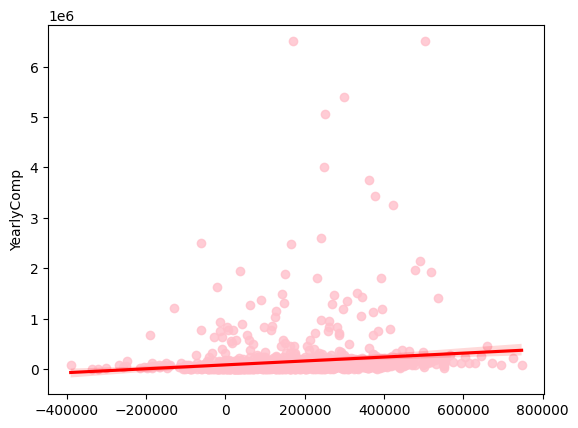

<Figure size 1000x800 with 0 Axes>

In [67]:
#create scatterplot with regression line
sns.regplot(data=numeric_df, y=Y_test, x=Y_pred, scatter_kws={"color": "pink"}, line_kws={"color": "red"})

plt.figure(figsize=(10,8))
# plt.title('Yearly Compensation')
# plt.xlabel('', fontsize=10)
# plt.ylabel('', fontsize=10)
# plt.show()


Second Attempt:

In [1]:
# drop language??
# numeric_df_2=numeric_df.drop